<a href="https://colab.research.google.com/github/maschmidt87/Project-Repository/blob/master/Convolutional_Neural_Networks_Image_Classification_Project_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Practice Project: Food Image Classification

----------------------------------------------------------------------
## **Context** 
-------------------------------------------------------------------------------
Image classification has become less complicated with deep learning and the availability of larger datasets and computational assets. The Convolution neural network is the most popular and extensively used image classification technique in the latest day.

Clicks is a stock photography company and is an online source of images available for people and companies to download. Photographers from all over the world upload food-related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually.

--------------------------------------------------------------------------------
## **Objective**
--------------------------------------------------------------------------------
Clicks have decided to use only three categories of food (**Bread**, **Soup**, and  **Vegetables-Fruits**) for now, and you as a data scientist at Clicks, need to build a classification model using a dataset consisting of images that would help to label the images into different categories. 

-----------------------------------------------------------------------------
## **Dataset**
----------------------------------------------------------------------------
The dataset folder contains different food images. The images are already split into Training and Testing folders.
Each folder has  four subfolders named **`Bread`**, **`Soup`**, and  **`Vegetables-Fruits`**. These folders have images of the respective classes.

## **Mount the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
import cv2 
import seaborn as sns 

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

## **Importing the Dataset**

**Instructions** to access the data through Google Colab:

Follow the below steps: 

1) Download the zip file from Olympus. 

2) Upload the file into your drive and unzip the folder using the code provided in the notebook. Do not unzip it manually.

3) Please check that the name of the file in your Google Drive is 'Food_Data.zip'. If it's not, then you may rename it on your drive or change it in the following cell.


4) Now, you can run the following cell. If all the earlier steps were done correctly, the dataset will be imported without any errors.

In [10]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Applied Data Science Program/Deep Learning (week 6)/Elective projects/Food_Data.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Preparing the Data**

The dataset has two folders, i.e., 'Training' and 'Testing'. Each of these folders has three sub-folders, namely 'Bread', 'Soup', and 'Vegetable-Fruit'. We will have the Training and Testing path stored in a variable named 'DATADIR'. The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'. 

### **Training Data**

We will convert each image into arrays and store them in an array called 'training_data' along with their class index. So this is how our training data looks like.

In [13]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "/content/Food_Data/Training"                                 # Path of training data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150    

In [14]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []  

# Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR, category)                                 # Joining images with labels
        class_num = category                                                   
        
        for img in os.listdir(path):                                           
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
          
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images 
          
            training_data.append([new_array, class_num])                       # Appending both the images and labels

create_training_data()

### **Testing Data**

We will do the same operation with our Testing data. We will convert each images into arrays and then append them to our array named 'testing_data' along with their class indexes.

**Hint:** Please observe what we did for training data and try to do the same for testing data.

In [15]:
# Storing the testing path in a variable named DATADIR_test, and storing the unique categories/labels in a list

DATADIR_test = "/content/Food_Data/Testing"                                 # Path of training data after unzipping
CATEGORIES = ["Bread", "Soup", "Vegetable-Fruit"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE = 150                                                                 # Defining the size of the image to 150    

In [16]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []  

# Storing all the testing images
def create_testing_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test, category)                                 # Joining images with labels
        class_num = category                                                   
        
        for img in os.listdir(path):                                           
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
          
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images 
          
            testing_data.append([new_array, class_num])                       # Appending both the images and labels

create_testing_data()

## **Visualizing images randomly from each class**

-----------------------------------------------------------------------------------------
### **Bread**
------------------------------------------------------------------------------------

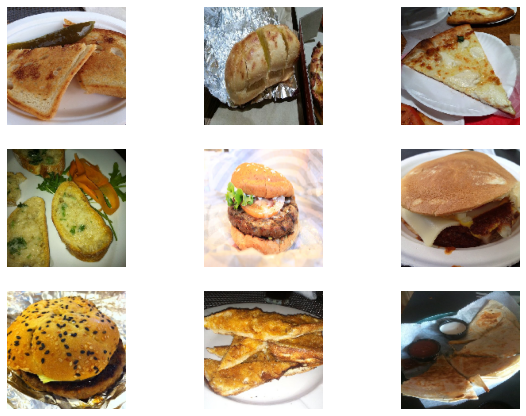

In [17]:
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
select_bread = np.random.choice(bread_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

Observations: Bread items shown are from a variety of foods - pizza, burgers, garlic bread, sandwiches, etc.  In short, there is much variety in the bread images included in the dataset.  Traingles and round-like shapes seem to be common.

------------------------------------------------------------------------------------------------
### **Soup**
-------------------------------------------------------------------------------------

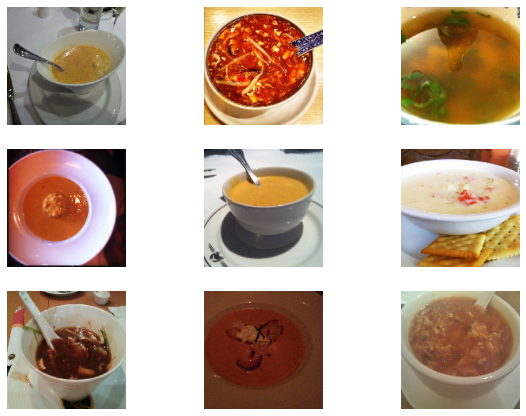

In [18]:
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
select_soup = np.random.choice(soup_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations: Oval or circular shapes are common in all images. Additionally, all the soups are contained in a bowl, with most holding a spoon.**

-------------------------------------------------------------------------------------------------------
### **Vegetable-Fruit**
--------------------------------------------------------------------------------------

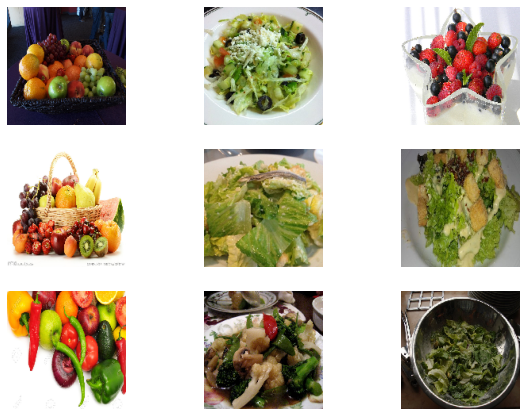

In [19]:
vegetable_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
select_vegetable_fruit = np.random.choice(vegetable_fruit_imgs, 9, replace = False)

fig = plt.figure(figsize = (10, 10))

for i in range(9):
    ax = fig.add_subplot(4, 3, i + 1)
  
    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_vegetable_fruit[i]}'
  
    fn = load_img(fp, target_size = (150, 150))
  
    plt.imshow(fn, cmap = 'Greys_r')
  
    plt.axis('off')

plt.show()  

**Observations: Some images contain clusters of round-like shapes, which can distinguish the images from bread and soup, which would only see one larger round shape. The vegetable dishares include green as a common shade. **

### **Data Preprocessing** 

The arrays training_data and testing_data had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our training_data and testing_data were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our training_data and testing_data, and store the images in X_train, and X_test, and the labels in y_train, and y_test respectively.

In [20]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []

np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                          # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [21]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test

In [22]:
# Converting the pixel values into Numpy array
X_train = np.array(X_train) 
X_test = np.array(X_test) 
X_train.shape

(3203, 150, 150, 3)

**Note:** Images are digitally represented in the form of NumPy arrays which can be observed from the X_train values generated above, so it is possible to perform all the preprocessing operations and build our CNN model using NumPy arrays directly. So, even if the data is provided in the form of NumPy arrays rather than images, we can use this to work on our model. 

In [23]:
# Converting the lists into DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object) 
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

Since the given data is stored in variables X_train, X_test, y_train, and y_test, there is no need to split the data further. 

## **Checking Distribution of Classes**

In [25]:
# Print the value counts of target variable y_train

y_train_count = y_train.Label.value_counts()
print(y_train_count)

print('*'*20)

#Let's normalize the counts to get a sense of the proportion for each image class
y_train_count_norm = y_train.Label.value_counts(normalize = True)
print(y_train_count_norm)

Soup               1500
Bread               994
Vegetable-Fruit     709
Name: Label, dtype: int64
********************
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: Label, dtype: float64


## **Normalizing the data**

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training the model of a neural network: 

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have values between 0-1.**

In [26]:
# Write your code here for normalizing training data X_train
X_train = X_train/255

In [27]:
# Write your code here for normalizing testing data X_test
X_test = X_test/255

## **Encoding Target Variable**

For any ML or DL techniques, the labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and the real labels.

In this case, we have 3 classes "Bread", "Soup", and "Vegetable-Fruit". We want the corresponding labels to look like:
* [1, 0, 0] --------- Bread
* [0, 1, 0] --------- Soup
* [0, 0, 1] --------- Vegetable-Fruit


Each class will be represented in the form of an array.

In [28]:
y_train_encoded = [ ]

for label_name in y_train["Label"]:
    if(label_name == 'Bread'):
        y_train_encoded.append(0)

    if(label_name == 'Soup'):
        y_train_encoded.append(1)

    if(label_name == 'Vegetable-Fruit'):
        y_train_encoded.append(2)

y_train_encoded = to_categorical(y_train_encoded, 3)
y_train_encoded

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [29]:
y_test_encoded = [ ]

for label_name in y_test["Label"]:
    if(label_name == 'Bread'):
        y_test_encoded.append(0)

    if(label_name == 'Soup'):
        y_test_encoded.append(1)

    if(label_name == 'Vegetable-Fruit'):
        y_test_encoded.append(2)

y_test_encoded = to_categorical(y_test_encoded, 3)
y_test_encoded
# Write your code here for encoding y_test and store the encoded labels in y_test_encoded.

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## **Model Building** 

Now that we have done data preprocessing, let's build the first Convolutional Neural Network (CNN) model.

### **Model 1 Architecture:**

* The first CNN Model will have three convolutional blocks.
* Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.
* Add first Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (150, 150, 3)**. Use **'relu' activation**.
* Add MaxPooling2D layer with **kernel size 2x2** and use **padding = 'same'**.
* Add a second Conv2D layer with **32 filters** and **a kernel size of 3x3**. Use the **'same' padding** and **'relu activation**.
* Follow it up with another MaxPooling2D layer **kernel size 2x2** and use **padding = 'same'**.
* Add a third Conv2D layer with **32 filters and the kernel size of 3x3**. Use the **'same' padding** and **'relu activation**. Once again, follow it up with another Maxpooling2D layer with **kernel size 2x2** and **padding = 'same'**.
* Once the convolutional blocks are added, add the Flatten layer.
* Finally, add dense layers. 
* Add first Dense layer with **100 neurons** and **'relu' activation**
* The last dense layer must have as many neurons as the number of classes, which in this case is 3 and use **'softmax' activation**.
* Initialize SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**
* Compile your model using the optimizer you initialized and use **categorical_crossentropy** as the loss function and 'accuracy' as the metric
* Print the model summary and write down your observations/insights about the model.

### **Model 1:**



**Note:** We need to clear the previous model's history from the Keras backend. Also, we must fix the seed for random number generators after clearing the backend to make sure we receive the same output every time we run the code.

In [30]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [31]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', input_shape = (150,150,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2,2), padding = 'same'))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation = 'relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(3, activation = 'softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

# Compiling the model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0

**Observations: This model consists of 1,185,107 parameters that are trainable, with no non-trainable parameters.**

### **Training the Model**

Let's now train the model using the training data.

In [32]:
# The following lines of code save the best model parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 30 epochs and validation_split as 10%
history = model.fit(X_train, 
          y_train_encoded,  
          epochs = 60, 
          batch_size= 32, validation_split = 0.10, callbacks = [es, mc])  

Epoch 1/60
91/91 [==============================] - ETA: 0s - loss: 1.0587 - accuracy: 0.4611
Epoch 1: val_accuracy improved from -inf to 0.50467, saving model to best_model.h5
91/91 [==============================] - 15s 37ms/step - loss: 1.0587 - accuracy: 0.4611 - val_loss: 1.0312 - val_accuracy: 0.5047
Epoch 2/60
89/91 [============================>.] - ETA: 0s - loss: 0.9918 - accuracy: 0.5011
Epoch 2: val_accuracy did not improve from 0.50467
91/91 [==============================] - 3s 29ms/step - loss: 0.9884 - accuracy: 0.5035 - val_loss: 1.6991 - val_accuracy: 0.3956
Epoch 3/60
89/91 [============================>.] - ETA: 0s - loss: 0.8289 - accuracy: 0.5794
Epoch 3: val_accuracy improved from 0.50467 to 0.57321, saving model to best_model.h5
91/91 [==============================] - 3s 32ms/step - loss: 0.8285 - accuracy: 0.5788 - val_loss: 0.8466 - val_accuracy: 0.5732
Epoch 4/60
89/91 [============================>.] - ETA: 0s - loss: 0.7588 - accuracy: 0.6194
Epoch 4: val_

### **Plotting the Training and Validation Accuracies**

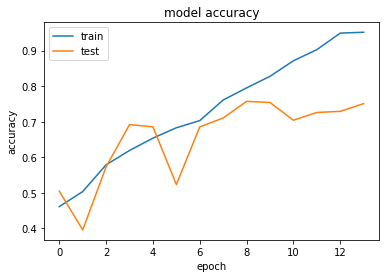

In [33]:
# Plotting the training and validation accuracies for each epoch 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Checking Test Accuracy**

In [34]:
model.evaluate(X_test, (y_test_encoded))

35/35 [==============================] - 1s 15ms/step - loss: 0.9449 - accuracy: 0.7495


[0.9449107050895691, 0.7495429515838623]

Observations: The training concluded well short (14) of the 60 epochs, given that the training set's performance stabilized at epoch 11-12.

The plot shows a consistent improvement of the training set up to nearly 95% accuracy.

The testing set, however, vascillated a great during the epochs, achieving its max accuracy at epoch 8.

Given that the training and testing set accuracies different by approximately .2, these model indicates overfitting.


### **Plotting Confusion matrix**

35/35 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       362
           1       0.76      0.83      0.79       500
           2       0.82      0.74      0.78       232

    accuracy                           0.75      1094
   macro avg       0.76      0.74      0.75      1094
weighted avg       0.75      0.75      0.75      1094



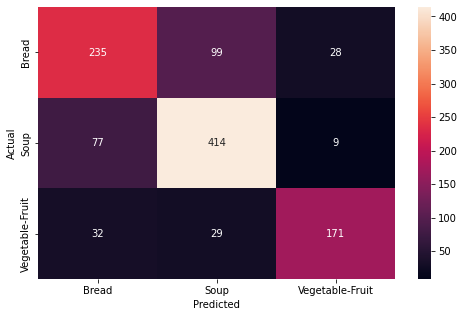

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true, pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**
The overall accuracy of the model is approximately 75% on the test data, with a number of misclassifications between the classes.

A large number of breads were predicated to be soups (99). Given the similar circular shapes noted, this is not surprising.

The model's best results come for soup, which saw a recall score of .83. Most soup misclassifications incorrectly assigned the actual soup image as 'bread'.

Misclassifications for Vegetable-Fruit were approximately split between Bread (32) and Soup (29). This is not surprising, since these images had less obvious features, and could be mis-assigned to either other class.




Let's try to build another model with a different architecture and see if we can improve the model performance. Since the first model was overfitting, we will add Dropout layers at the end of each convolutional block.

### **Model 2 Architecture:**

* We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
* Add first Conv2D layer with **256 filters** and a **kernel size of 5x5**. Use the **'same' padding** and provide the **input shape = (150, 150, 3)**. Use **'relu' activation**.
* Add MaxPooling2D layer with **kernel size 2x2** and **stride size 2x2**.
* Add a Dropout layer with a dropout ratio of **0.25**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 5x5**. Use the **'same' padding** and **'relu' activation**.
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.25 dropout ratio.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and **'relu' activation**. 
* Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.
* Add a fourth Conv2D layer with **32 filters** and a **kernel size of 3x3**. Use the **'same' padding** and **'relu' activation**. 
* Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.
* Once the convolutional blocks are added, add the Flatten layer.
* Add first fully connected dense layer with 64 neurons and use **'relu' activation**.
* Add a second fully connected dense layer with 32 neurons and use **'relu' activation**.
* Add your final dense layer with 3 neurons and use **'softmax' activation function**.
* Initialize an **Adam optimizer** with a learning rate of 0.001.
* Compile your model with the optimizer you initialized and use **categorical_crossentropy** as the loss function and the 'accuracy' as the metric.
* Print your model summary and write down your observations.

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [46]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 256 filters and kernel size 5x5, with ReLU activation and padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model_2.add(Conv2D(256,(5,5), activation = 'relu', padding = 'same', input_shape = (150,150,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same', strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(.25))

# Adding second conv layer with 128 filters and with kernel size 5x5 and ReLu activation function
model_2.add(Conv2D(128,(5,5), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same', strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(.25))

# Adding third conv layer with 64 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same', strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(.25))

# Adding fourth conv layer with 32 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same', strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(.25))

# Flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding first fully connected dense layer with 64 neurons 
model_2.add(Dense(64, activation = 'relu'))

# Adding second fully connected dense layer with 32 neurons 
model_2.add(Dense(32, activation = 'relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(3, activation = 'softmax'))

# Using Adam Optimizer
optimizer = Adam(learning_rate = 0.001)

# Compile the model
model_2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [47]:
# Print the model summary
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 256)     19456     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 256)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 256)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 128)       819328    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 38, 38, 128)      

**Observations:__**

1,138,083 parameters are to be trained in this model. The dropout layers added will decrease the number of neurons activated, making the actual number of parameters less.

The model includes more blocks than our initial model, which should improve the overall performance, and hopefully decrease the overfitting seen in the previous model.


### **Training the Model**

Let's now train the model using the training data.

In [48]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Train the model here
# Fitting the model with 30 epochs and validation_split as 10%
history=model_2.fit(X_train, 
          y_train_encoded,  
          epochs = 60, 
          batch_size= 32, validation_split = 0.10, callbacks = [es, mc])  

Epoch 1/60
90/91 [============================>.] - ETA: 0s - loss: 1.0792 - accuracy: 0.4503
Epoch 1: val_accuracy improved from -inf to 0.48287, saving model to best_model.h5
91/91 [==============================] - 19s 177ms/step - loss: 1.0792 - accuracy: 0.4504 - val_loss: 1.0560 - val_accuracy: 0.4829
Epoch 2/60
90/91 [============================>.] - ETA: 0s - loss: 1.0582 - accuracy: 0.4660
Epoch 2: val_accuracy did not improve from 0.48287
91/91 [==============================] - 15s 168ms/step - loss: 1.0586 - accuracy: 0.4656 - val_loss: 1.0497 - val_accuracy: 0.4829
Epoch 3/60
90/91 [============================>.] - ETA: 0s - loss: 1.0460 - accuracy: 0.4604
Epoch 3: val_accuracy did not improve from 0.48287
91/91 [==============================] - 15s 168ms/step - loss: 1.0459 - accuracy: 0.4604 - val_loss: 1.0540 - val_accuracy: 0.4393
Epoch 4/60
90/91 [============================>.] - ETA: 0s - loss: 1.0333 - accuracy: 0.4549
Epoch 4: val_accuracy did not improve from 

### **Plotting the Training and Validation Accuracies**

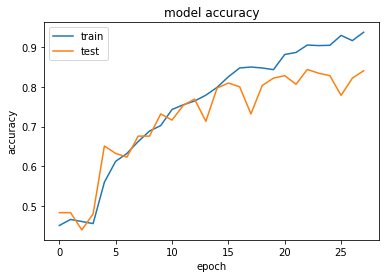

In [49]:
# Plotting the training and validation accuracies for each epoch 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Checking Test Accuracy**

In [50]:
model_2.evaluate(X_test, (y_test_encoded))

35/35 [==============================] - 1s 36ms/step - loss: 0.6424 - accuracy: 0.8080


[0.6423875093460083, 0.808043897151947]

**Observations:**

Overfitting has diminished notably compared to the previous model.  The test accuracy improved to .81, cutting the difference between test and train accuracy to .13.  Thus, adding the dropout layers helped the model.

The training set ran for double the number of epochs as the first model (28), showing improvement through each iteration.

The test accuracy improvement began vascillating and overall improving more  gradually by epoch 10, and hit its approximately maximum by epoch 20.

### **Plotting Confusion matrix**

In [51]:
pred = model_2.predict(X_test)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true, pred))



35/35 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       362
           1       0.81      0.89      0.85       500
           2       0.92      0.73      0.81       232

    accuracy                           0.81      1094
   macro avg       0.83      0.79      0.80      1094
weighted avg       0.81      0.81      0.81      1094



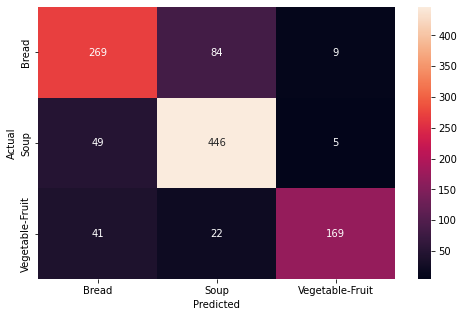

In [52]:
#Plot the heatmap using confusion matrix

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:__**

Overall accuracy has improved to .81 in this model, a significant improvement compared to the previous model.

Actual bread misclassified as soup remains the the most misclassified set of items (84), though this still is an improvement compared to the previous model (99).

Additional layers may still improve the accuracy of the model even further.


### **Prediction**

Let us predict using the best model, i.e., model 2, by plotting one random image from X_test data and see if our best model is predicting the image correctly or not.

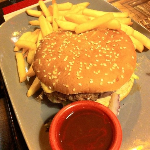

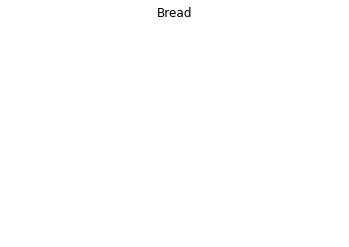

In [53]:
# Plotting the test image 
cv2_imshow(X_test[1]* 255)
i=y_test.Label[1]
i=np.argmax(i)
if(i == 0):
    plt.title("Bread")
if(i==1):
    plt.title("Soup")
if(i==2):
    plt.title("Vegetable-Fruit")

plt.axis('off')
plt.show()

In the blank given below, write the name of the model that had the best results.

In [54]:
# Predicting the test image with the best model and storing the prediction value in res variable
res = model_2.predict(X_test[1].reshape(1, 150, 150, 3))

1/1 [==============================] - 0s 42ms/step


In [55]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

Bread


**Observations:_________**

Our model is able to accurately classify the given randomly selected image as bread.

### **Conclusion:__**

1. Our second CNN model, which added additional neurons and switched off some in each layer and ran for more epochs was able to deliver a model that exceeded 80% on the test data set of images.

2. Further improvement can still be made here, since a difference of more than .1 still was found between the train and test sets.  We could continue to complexify the model to see if we could attain a test accuracy of closer to .9.

3. These images are quite common. Transfer learning could be employed to enhance modeling.

4. Once fully optimized, our model could be used to classify further sets of images.

5. Hyperparameter tuning could be employed to determine the optimal convolutional blocks, filters, dropout layers, etc.
